# Exploring Sketchfab

A notebook to allow polite examination of Sketchfab data via its api.

# Get the code
`git clone` to get the code

`cd` into the directory, then set your api token.

You get your api token from your password settings page on sketchfab. Click on the key icon at left, add a new token called `sketchfab` and paste the api in. It will save automatically. Then, the code below will load that api up as a secret (and not save it directly in this notebook.)

Then we import the `sketchfab_scraper` and we're off!

In [ ]:
!git clone https://github.com/shawngraham/km-sf.git

Cloning into 'km-sf'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 38 (delta 13), reused 13 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 48.70 KiB | 3.04 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
%cd km-sf
#!pip install -r requirements.txt ## ignore in colab environment

/content/km-sf


In [ ]:
!pwd

/content/km-sf


In [ ]:
# using the 'key' icon at left, create a new 'secret' called 'sketchfab' (no quotes) and then put your api key in the value box. It'll save automatically.
from google.colab import userdata
token = userdata.get('sketchfab')

In [ ]:
# Import the scraper module
from sketchfab_scraper import SketchfabScraper, quick_search



# Set your API token here (optional)
API_TOKEN = token

# Initialize the scraper
# rate_limit_delay: seconds between requests (increase if you get 429 errors)
scraper = SketchfabScraper(api_token=API_TOKEN, rate_limit_delay=2)

print("✓ Scraper initialized successfully!")



✓ Scraper initialized successfully!


### Comments and Other Metadata are separated

Note that `scraper.search_cultural_heritage` will save that comments exist. To download the comments at the same time as the search, you need `scraper.search_and_extract_comments`.  

In [ ]:
from sketchfab_scraper import SketchfabScraper

scraper = SketchfabScraper()

# Search and extract comments in one call
models_df, comments_df = scraper.search_and_extract_comments(
    query="roman",
    max_results=50
)

# Now you have two DataFrames:
print(f"Models: {len(models_df)}")
print(f"Comments: {len(comments_df)}")

# Export for text analysis
comments_df.to_csv('comments_for_analysis.csv', index=False)

Models: 50
Comments: 1


In [ ]:
# note that the comments themselves will be in the 'body' column:
comments_df

,uid,body,createdAt,htmlBody,parentUid,model_uid,model_name
0,869a2cfdacdc401d852457198267c35d,Hello You create beautiful arts🤩❤️\nI’m intere...,2025-11-05T11:25:01.869025,,,aefeced276ff4d30a3c801affe2fb4a9,Fibula gold plated 250-375 AD


In [ ]:
models_df.to_csv('models_for_analysis_query_roman.csv', index=False)

## Now Let's Do It!

In [ ]:
#
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Import the scraper module
from sketchfab_scraper import SketchfabScraper, quick_search

In [ ]:
# Advanced search with multiple filters
# this DOES NOT grab comments.
# for comments, you have to start with this (and then put paramerters between the parentheses) ->
#models_df, comments_df = scraper.search_and_extract_comments()

models_filtered = scraper.search_models(
    query="medieval architecture",
    categories='cultural-heritage-history',
    downloadable=True,  # Only downloadable models
    sort_by='-likeCount',  # Sort by most liked
    max_results=30,
    enrich_with_details=True,  # Get ALL fields
    include_comments=True       # Include comments too
)

df_medieval = scraper.to_dataframe(models_filtered)
print(f"Found {len(df_medieval)} downloadable medieval architecture models")
df_medieval[['name', 'likeCount', 'isDownloadable']].head(10)

Found 30 downloadable medieval architecture models


,name,likeCount,isDownloadable
0,The Upper Vestibule,1368,True
1,1924.859 Table Fountain,419,True
2,Pack of old towers in ruins,418,True
3,"Lycian cliff tombs, Dalyan",389,True
4,Poor Desert House,389,True
5,Medieval Farm Village,350,True
6,Ruined Round Tower,313,True
7,House,291,True
8,Tomb of Tu Duc,285,True
9,Medieval Cathedral,276,True


## Many Search Terms

In [ ]:
# Define search terms related to cultural heritage
search_terms = [
    "archaeology",
    "ancient",
    "historical",
    "monument",
    "artifact",
    "ruins",
    "heritage",
    "museum"
]

all_models = []
all_comments = []

for term in search_terms:
    print(f"Searching for: {term}...")

    df_temp, comments_temp = scraper.search_and_extract_comments(
        query=term,
        max_results=100,
        sort_by='-relevance',
        enrich_with_details=True,  # Get ALL fields
        include_comments=True       # Include comments too
    )
    all_models.append(df_temp)
    all_comments.append(comments_temp)
    print(f"  Found {len(df_temp)} models")

# Combine all results
df_combined = pd.concat(all_models, ignore_index=True)
comments_combined = pd.concat(all_comments, ignore_index=True)

# Remove duplicates based on uid
df_combined = df_combined.drop_duplicates(subset=['uid'], keep='first')
comments_combined = comments_combined.drop_duplicates(subset=['uid'], keep='first')

print(f"\n✓ Total unique models collected: {len(df_combined)}")

Searching for: archaeology...


## Data Views

In [ ]:
# Basic statistics
print("Dataset Overview:")
print("="*50)
print(f"Total models: {len(df_combined)}")
print(f"Unique users: {df_combined['user_username'].nunique()}")
print(f"Downloadable models: {df_combined['isDownloadable'].sum()}")
print(f"\nEngagement Statistics:")
print(f"Total views: {df_combined['viewCount'].sum():,}")
print(f"Total likes: {df_combined['likeCount'].sum():,}")
print(f"Average views per model: {df_combined['viewCount'].mean():.1f}")
print(f"Average likes per model: {df_combined['likeCount'].mean():.1f}")



Dataset Overview:
Total models: 598
Unique users: 187
Downloadable models: 370

Engagement Statistics:
Total views: 24,470
Total likes: 1,066
Average views per model: 40.9
Average likes per model: 1.8


In [ ]:
# Most popular models
print("Top 10 Most Viewed Models:")
top_viewed = df_combined.nlargest(10, 'viewCount')[['name', 'user_displayName', 'viewCount', 'likeCount']]
display(top_viewed)



Top 10 Most Viewed Models:


,name,user_displayName,viewCount,likeCount
574,Egyptian Ruins,local.yany,3468,178
575,Egyptian Ruins,local.yany,2981,158
573,Egyptian Ruins,local.yany,1625,101
392,Funerary monument for Zerlendi family,CalatorPR,1346,4
579,Patio in an abandoned tenement house,archiwum_xyz,1057,36
551,Antioch Church of St. Stephen in Mtskheta,Mikhail Volkov,1050,47
560,Mystical Stone Platform (01),yb2o4,639,13
585,Clare Abbey - Clare Castle/Ballybeg - Ireland,Mi6 BIM ANIMATION,468,3
578,Medieval fortress tower with duckweed moat,yelizegi - PUNTTULANBRO,340,14
485,Old St Stephen's Church Fylingdales,Shiro Morturn,250,4


In [ ]:
# Most prolific creators
creator_counts = df_combined['user_username'].value_counts().head(10)
print("Top 10 Most Prolific Creators:")
display(creator_counts)

Top 10 Most Prolific Creators:


,count
user_username,
GlobalDigitalHeritage,89
hillforts,64
tippstudies,50
Mark.Jeffcock,19
shareeurope.net,17
caimin,16
hjft,12
morturn,11
ARCSMU,10


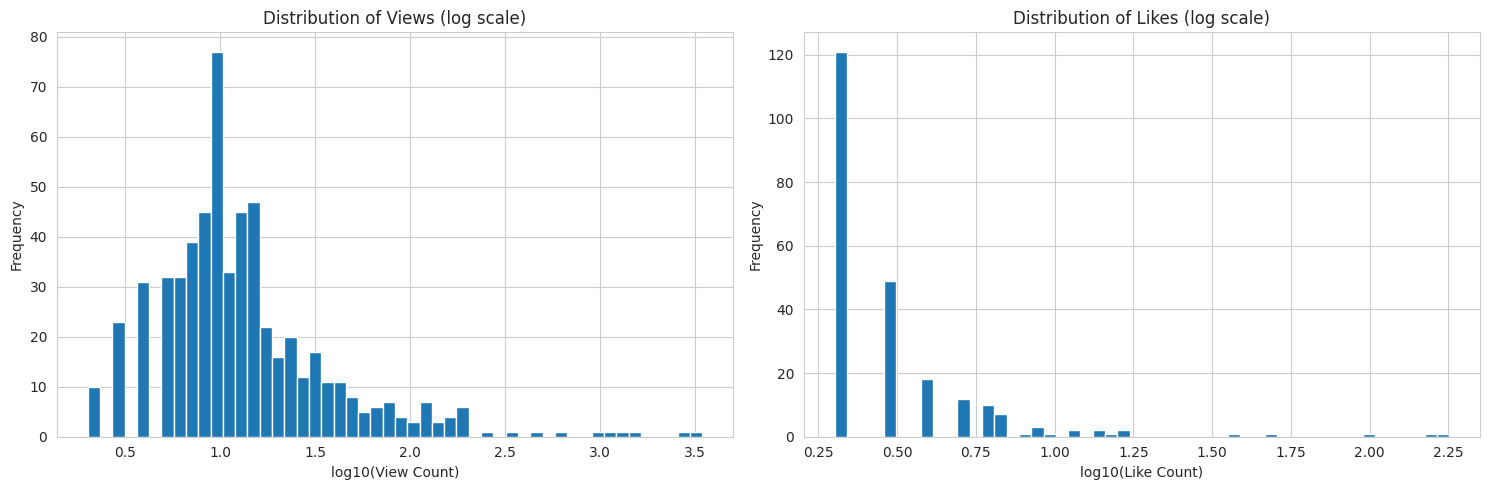

In [ ]:
import numpy as np
# Distribution of views and likes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Views distribution (log scale)
df_combined[df_combined['viewCount'] > 0]['viewCount'].apply(lambda x: np.log10(x+1)).hist(bins=50, ax=axes[0])
axes[0].set_title('Distribution of Views (log scale)')
axes[0].set_xlabel('log10(View Count)')
axes[0].set_ylabel('Frequency')

# Likes distribution (log scale)
df_combined[df_combined['likeCount'] > 0]['likeCount'].apply(lambda x: np.log10(x+1)).hist(bins=50, ax=axes[1])
axes[1].set_title('Distribution of Likes (log scale)')
axes[1].set_xlabel('log10(Like Count)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

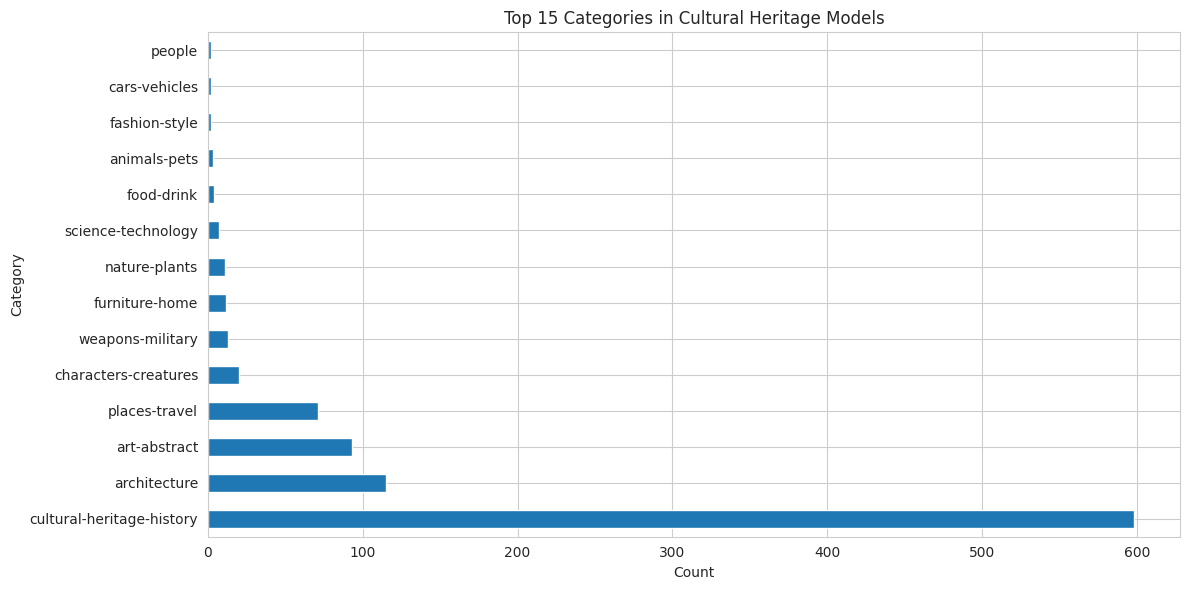

In [ ]:
# Most common categories (if models have multiple categories)
# Split and count all categories
all_categories = df_combined['categories'].str.split(', ').explode()
category_counts = all_categories.value_counts().head(15)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='barh')
plt.title('Top 15 Categories in Cultural Heritage Models')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

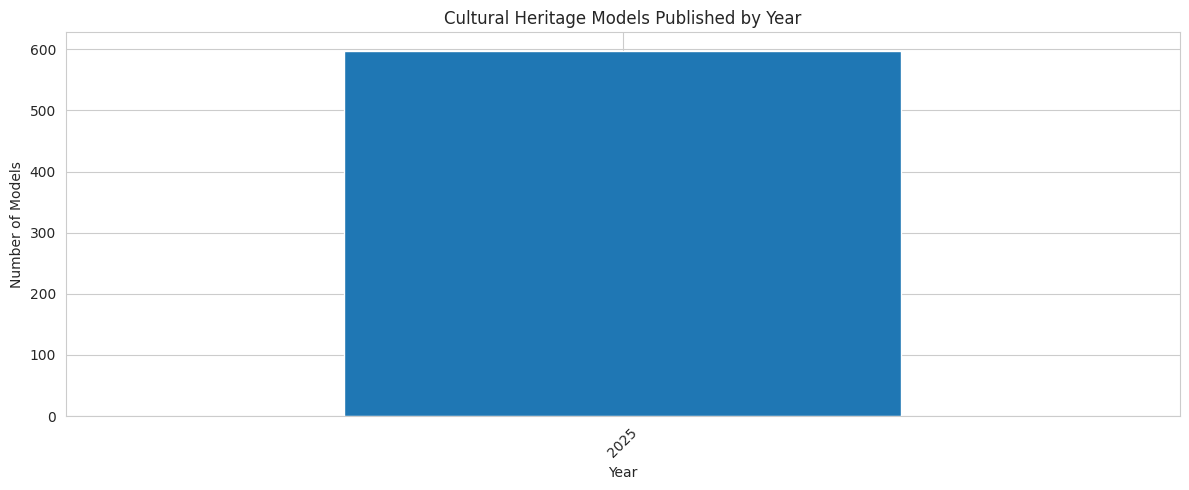

In [ ]:


# Publication timeline
# Convert publishedAt to datetime
df_combined['publishedAt'] = pd.to_datetime(df_combined['publishedAt'])
df_combined['publishedYear'] = df_combined['publishedAt'].dt.year
df_combined['publishedMonth'] = df_combined['publishedAt'].dt.to_period('M')

# Plot by year
yearly_counts = df_combined['publishedYear'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
yearly_counts.plot(kind='bar')
plt.title('Cultural Heritage Models Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Discourses

In [ ]:


# Most common tags
all_tags = df_combined['tags'].str.split(', ').explode()
tag_counts = all_tags.value_counts().head(30)

print("Top 30 Most Common Tags:")
display(tag_counts)



Top 30 Most Common Tags:


,count
tags,
archaeology,123
museum,110
spain,95
museumcollection,94
archaeology-3dmodel-photogrammetry,91
america,84
ireland,66
lidar,64
photogrammetry,58


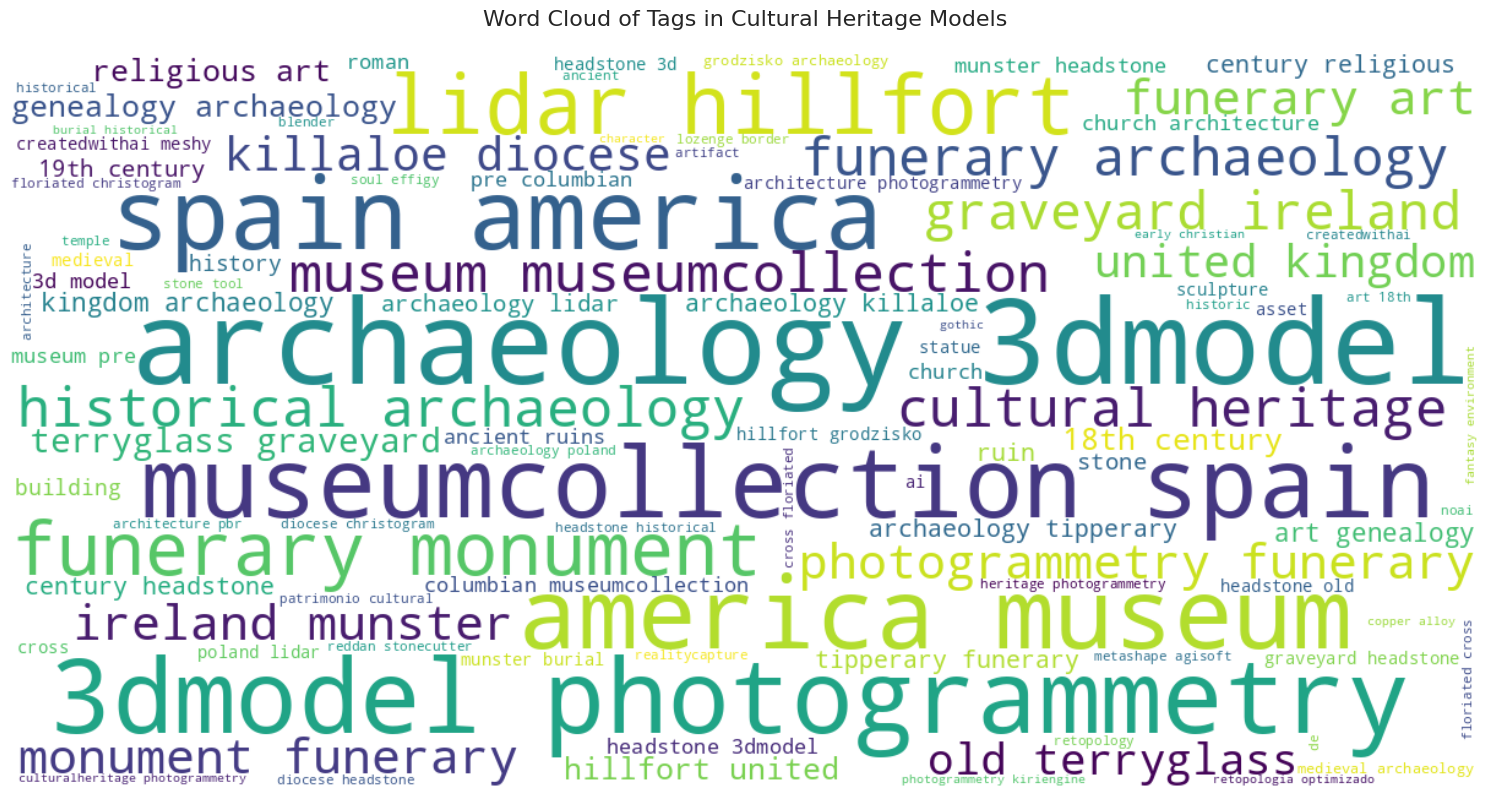

In [ ]:
# Word cloud of tags
from wordcloud import WordCloud

# Combine all tags into a single string
tags_text = ' '.join(all_tags.dropna().astype(str))

# Create word cloud
wordcloud = WordCloud(width=1200, height=600, background_color='white',
                     colormap='viridis', max_words=100).generate(tags_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags in Cultural Heritage Models', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [ ]:


# Analyze descriptions for common terms
import re
from collections import Counter

# Combine all descriptions
all_descriptions = ' '.join(df_combined['description'].fillna('').astype(str))

# Extract words (simple tokenization)
words = re.findall(r'\b[a-z]{4,}\b', all_descriptions.lower())

# Common stopwords to exclude
stopwords = {'this', 'that', 'with', 'from', 'have', 'been', 'were', 'their',
             'there', 'what', 'when', 'where', 'which', 'who', 'will', 'would',
             'could', 'should', 'about', 'these', 'those', 'more', 'than', 'into',
             'such', 'some', 'other', 'them', 'then', 'also', 'only', 'very',
             'much', 'many', 'most', 'made', 'make', 'strong', 'https', 'model'}

# Filter stopwords
filtered_words = [w for w in words if w not in stopwords]

# Count most common
word_counts = Counter(filtered_words).most_common(30)

print("Top 30 Words in Model Descriptions:")
for word, count in word_counts:
    print(f"{word:20s}: {count}")



Top 30 Words in Model Descriptions:
museum              : 314
century             : 236
spain               : 178
collaboration       : 174
america             : 169
collection          : 157
part                : 138
cross               : 136
using               : 129
created             : 125
period              : 120
work                : 119
digital             : 118
heritage            : 117
madrid              : 115
culture             : 112
hillforts           : 110
between             : 108
images              : 108
visit               : 100
medieval            : 98
number              : 98
catalog             : 96
inscription         : 94
description         : 93
collections         : 91
want                : 91
stone               : 90
ministry            : 90
signed              : 89


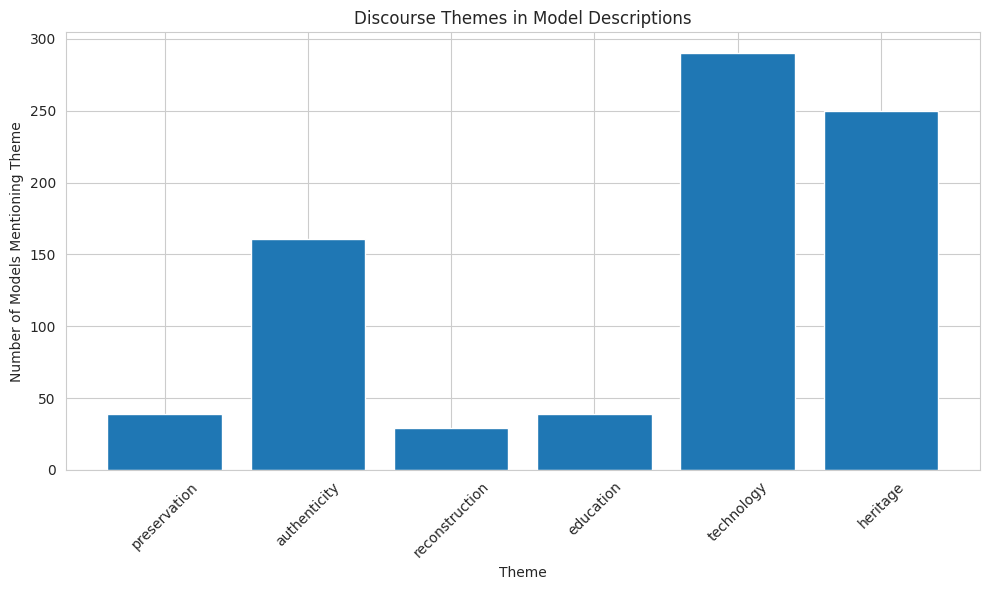


Discourse Theme Frequency:
preservation        :   39 models (6.5%)
authenticity        :  161 models (26.9%)
reconstruction      :   29 models (4.8%)
education           :   39 models (6.5%)
technology          :  290 models (48.5%)
heritage            :  250 models (41.8%)


In [ ]:
# Analyze specific discourse-related keywords
discourse_keywords = {
    'preservation': ['preserv', 'conserv', 'restor', 'protect'],
    'authenticity': ['authentic', 'original', 'genuine', 'real', 'actual'],
    'reconstruction': ['reconstruct', 'recreat', 'rebuild', 'remodel'],
    'education': ['educat', 'learn', 'teach', 'study', 'research'],
    'technology': ['scan', 'photogrammetry', 'laser', 'digital', '3d'],
    'heritage': ['heritage', 'cultural', 'historic', 'legacy', 'tradition']
}

# Count occurrences
discourse_counts = {}
descriptions_lower = df_combined['description'].fillna('').str.lower()

for category, keywords in discourse_keywords.items():
    count = sum(descriptions_lower.str.contains('|'.join(keywords), regex=True))
    discourse_counts[category] = count

# Plot
plt.figure(figsize=(10, 6))
plt.bar(discourse_counts.keys(), discourse_counts.values())
plt.title('Discourse Themes in Model Descriptions')
plt.xlabel('Theme')
plt.ylabel('Number of Models Mentioning Theme')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nDiscourse Theme Frequency:")
for theme, count in discourse_counts.items():
    percentage = (count / len(df_combined)) * 100
    print(f"{theme:20s}: {count:4d} models ({percentage:.1f}%)")

License Distribution:


,count
license_label,
CC Attribution,200
CC Attribution-NonCommercial,94
CC Attribution-ShareAlike,64
Free Standard,6
CC Attribution-NonCommercial-ShareAlike,4
CC Attribution-NonCommercial-NoDerivs,2


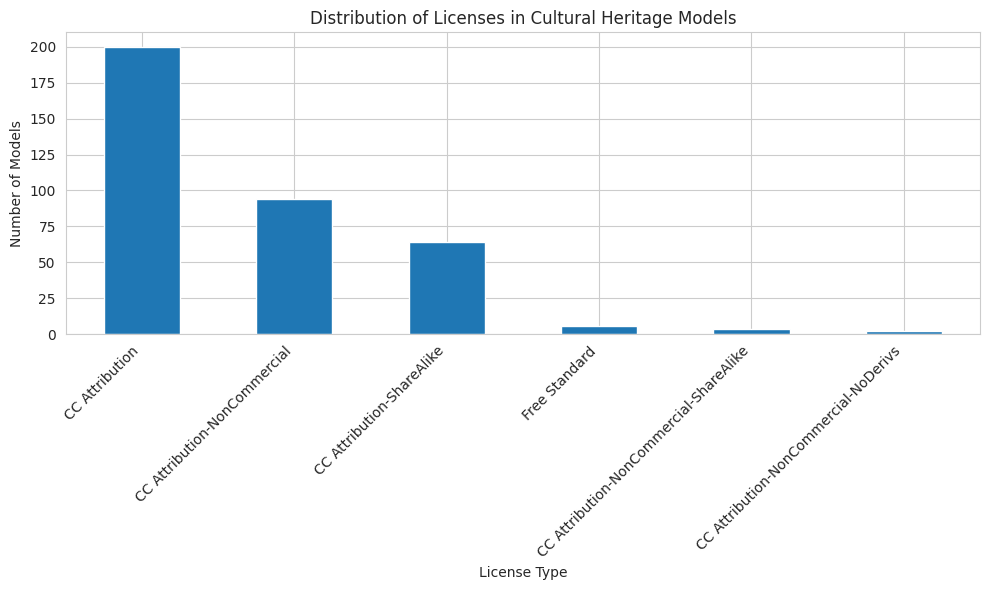

In [ ]:
# License distribution
license_counts = df_combined['license_label'].value_counts()

print("License Distribution:")
display(license_counts)

# Plot
plt.figure(figsize=(10, 6))
license_counts.plot(kind='bar')
plt.title('Distribution of Licenses in Cultural Heritage Models')
plt.xlabel('License Type')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Export

In [ ]:


# Export to CSV
output_filename = f'cultural_heritage_models_{datetime.now().strftime("%Y%m%d")}.csv'
scraper.export_to_csv(df_combined, output_filename)

print(f"✓ Data exported to {output_filename}")
print(f"  Total records: {len(df_combined)}")
print(f"  Columns: {', '.join(df_combined.columns.tolist())}")



In [ ]:
# Export a subset with key columns for qualitative analysis
analysis_columns = [
    'uid', 'name', 'description', 'tags', 'categories',
    'user_username', 'user_displayName',
    'license_label', 'publishedAt',
    'viewCount', 'likeCount', 'commentCount',
    'isDownloadable', 'viewerUrl'
]

df_analysis = df_combined[analysis_columns]
analysis_filename = f'cultural_heritage_analysis_{datetime.now().strftime("%Y%m%d")}.csv'
scraper.export_to_csv(df_analysis, analysis_filename)

print(f"✓ Analysis subset exported to {analysis_filename}")

## Advanced Search Examples

In [ ]:
# Get all models from a specific user
username = "electricarchaeo"  # Replace with actual username

# Uncomment to run:
user_models = scraper.get_user_models(username, max_results=100)
df_user = scraper.to_dataframe(user_models)
print(f"User {username} has {len(df_user)} models")
display(df_user[['name', 'viewCount', 'likeCount']].head())


User electricarchaeo has 25 models


,name,viewCount,likeCount
0,"Air Canada Stewardess' Dress, CSTM",140,0
1,House-of-garden,54,1
2,Billings Estate Smoke House,55,0
3,House with the Garden - Experiment,65,1
4,J.R. Booth timber stamp,24,0


In [ ]:
# Search for models with specific Creative Commons licenses
cc_models = scraper.search_models(
    query="archaeology",
    categories='cultural-heritage-history',
    licenses=['cc0', 'by', 'by-sa'],  # CC0 and Attribution licenses
    downloadable=True,
    max_results=50
)

df_cc = scraper.to_dataframe(cc_models)
print(f"Found {len(df_cc)} openly licensed archaeology models")
print("\nLicense breakdown:")
display(df_cc['license_label'].value_counts())

In [ ]:
# Search for models by polygon count (complexity)
# Useful for understanding modeling approaches

low_poly_models = scraper.search_models(
    query="ancient",
    categories='cultural-heritage-history',
    max_face_count=50000,  # Low-poly models
    max_results=30
)

high_poly_models = scraper.search_models(
    query="ancient",
    categories='cultural-heritage-history',
    min_face_count=500000,  # High-poly models
    max_results=30
)

df_low_poly = scraper.to_dataframe(low_poly_models)
df_high_poly = scraper.to_dataframe(high_poly_models)

print(f"Low-poly models (< 50k faces): {len(df_low_poly)}")
print(f"High-poly models (> 500k faces): {len(df_high_poly)}")
print(f"\nAverage engagement comparison:")
print(f"  Low-poly views:  {df_low_poly['viewCount'].mean():.0f}")
print(f"  High-poly views: {df_high_poly['viewCount'].mean():.0f}")

## More about extracting comments

See the [Comment_Text_Analysis.md](https://github.com/shawngraham/km-sf/blob/main/COMMENT_TEXT_ANALYSIS.md) document for examples of how to get the comments out of your data (for instance, if you've scraped and compiled a bunch of data and now you just want a subset of that data for other analysis).